In [ ]:
pip install mysql-connector

In [1]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [2]:
conn = sql.connect(
    host = '18.136.157.135',
    database = 'project_sales',
    port = '3306',
    user = 'dm_team2',
    passwd = 'DM!$Team&27@9!20!'
)

In [3]:
mycursor  = conn.cursor()

In [4]:
mycursor.execute("select * from data")

In [5]:
data = pd.DataFrame(columns=['Created','Product_ID','Source','Mobile','EMAIL','Sales_Agent','Location','Delivery_Mode','Status'])
myresult = mycursor.fetchall()
for i in myresult:
    a_series = pd.Series(i, index = data.columns)
    data = data.append(a_series,ignore_index=True)

In [6]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [7]:
data.shape

(7422, 9)

In [8]:
df = data.copy()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [10]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [11]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [12]:
data.Created

0       14-11-2018 10:05
1       14-11-2018 09:22
2       14-11-2018 09:21
3       14-11-2018 08:46
4       14-11-2018 07:34
              ...       
7417    28-04-2018 09:45
7418    28-04-2018 09:43
7419    28-04-2018 09:20
7420    28-04-2018 08:04
7421    28-04-2018 07:54
Name: Created, Length: 7422, dtype: object

In [13]:
data.Location.unique()

array(['', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [14]:
data['Product_ID'] = data['Product_ID'].replace('','0')

In [15]:
data['Source'] = data['Source'].replace('','mis')

In [16]:
data['Mobile'] = data['Mobile'].replace('','0')

In [17]:
data['EMAIL'] = data['EMAIL'].replace('#VALUE!','mis')

In [18]:
data['Sales_Agent'] = data['Sales_Agent'].replace('','mis')

In [19]:
data['Location'] = data['Location'].replace('','mis')

In [20]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,0,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,mis,Mode-5,Open
1,14-11-2018 09:22,0,Website,XXXXXXX,mis,Sales-Agent-10,mis,Mode-5,Open
2,14-11-2018 09:21,0,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,mis,Mode-5,Open
3,14-11-2018 08:46,0,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,mis,Mode-5,Open
4,14-11-2018 07:34,0,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,mis,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,0,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,0,mis,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,0,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,0,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [21]:
# Dropping the columns which are of no use in analysis
data.drop(['Mobile'],axis=1,inplace=True)
data.drop(['EMAIL'],axis=1,inplace=True)
data.drop(['Created'],axis=1,inplace=True)

In [22]:
data["Product_ID"] = data["Product_ID"].astype('int')

In [23]:
data.Source.unique()

array(['Website', 'mis', 'Live Chat-Google Organic', 'Call',
       'Live Chat-Direct', 'By Recommendation', 'Customer Referral',
       'Live Chat-Blog', 'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [24]:
data.Source.replace(['Live Chat-Google Organic','Live Chat-Direct','Live Chat-Blog','Live Chat -PPC','Live Chat-Google Ads',
                    'Live Chat-Adwords Remarketing','Live Chat-CPC','Live Chat-Quora','Live Chat-Justdial',
                    'Live Chat-Youtube'],'Live Chat',inplace=True)

In [25]:
data.Source.replace(['Existing Client','CRM form','Existing Customer','Personal Contact'],'Existing Customer',inplace=True)

In [26]:
data.Source.replace(['By Recommendation','Customer Referral'],'Customer Referral',inplace=True)

In [27]:
data.Source.replace(['Website','US Website','Just Dial'],'Website',inplace=True)

In [28]:
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Campaign','Other'],'Campaign',inplace=True)

In [29]:
data.Location.unique()

array(['mis', 'Bangalore', 'Other Locations', 'UAE', 'Trivandrum',
       'Hyderabad', 'Chennai', 'UK', 'USA', 'Delhi', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [30]:
data.Location.replace(['UAE','UK','USA','Singapore','AUSTRALIA','EUROPE','Malaysia'],'Foreign',inplace=True)
data.Location.replace(['Bangalore','Delhi','Pune','Hyderabad','Howrah','Chennai','Kolkata','Mumbai',
                       'Trivandrum'],'Indian',inplace=True)
data.Location.replace('mis','Other Locations',inplace=True)

In [31]:
data.Status.unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

In [32]:
# Defining 'Status' as 'High Potential' or 'Low Potential'
data.Status.replace(['Open', 'Potential', 'In Progress Positive','CONVERTED','Long Term','converted'],
                    'High Potential',inplace=True)
data.Status.replace(['Not Responding','Just Enquiry','Junk Lead','In Progress Negative','LOST'],
                    'Low Potential',inplace=True)

In [33]:
data.head(20)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,Website,Sales-Agent-11,Other Locations,Mode-5,High Potential
1,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
2,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
3,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
4,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
5,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
6,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
7,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
8,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential
9,0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential


<AxesSubplot:xlabel='Product_ID', ylabel='count'>

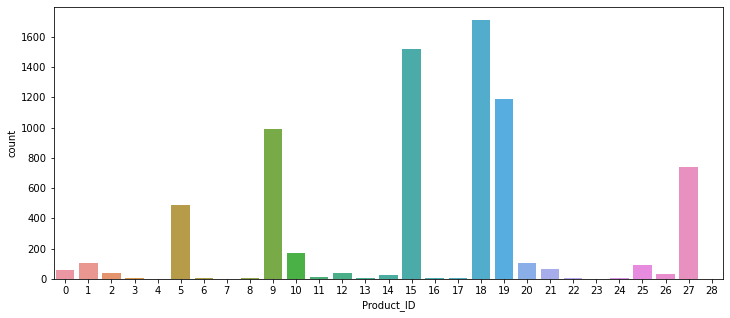

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(data.Product_ID)

<AxesSubplot:xlabel='Source', ylabel='count'>

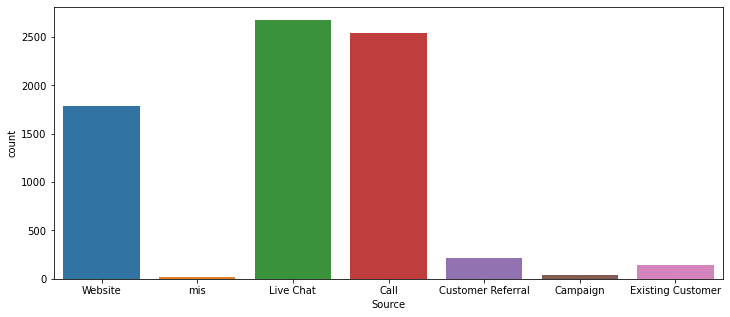

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(data.Source)

<AxesSubplot:xlabel='Sales_Agent', ylabel='count'>

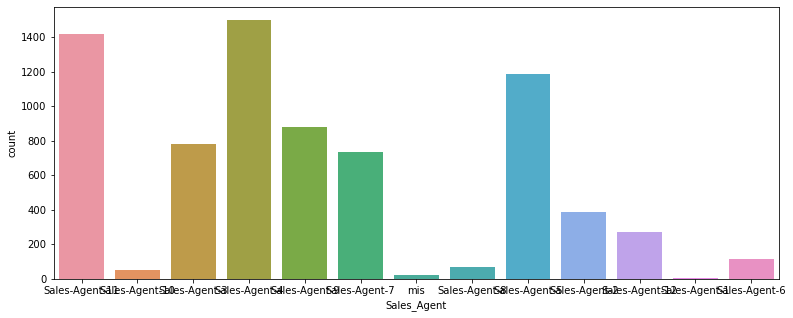

In [36]:
plt.figure(figsize=(13,5))
sns.countplot(data.Sales_Agent)

<AxesSubplot:xlabel='Location', ylabel='count'>

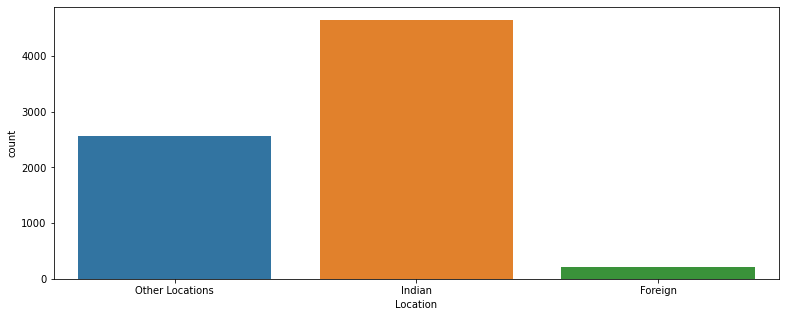

In [37]:
plt.figure(figsize=(13,5))
sns.countplot(data.Location)

<AxesSubplot:xlabel='Delivery_Mode', ylabel='count'>

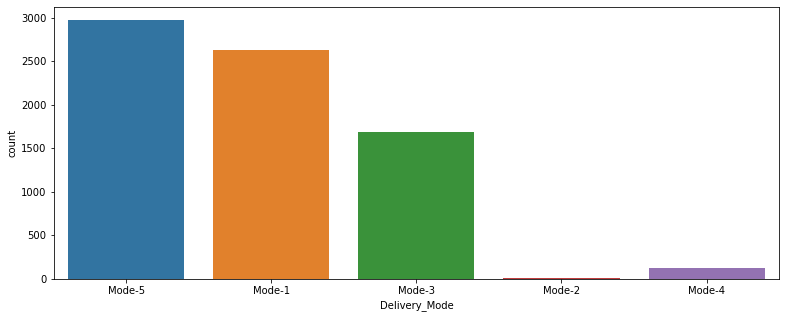

In [38]:
plt.figure(figsize=(13,5))
sns.countplot(data.Delivery_Mode)

<AxesSubplot:xlabel='Status', ylabel='count'>

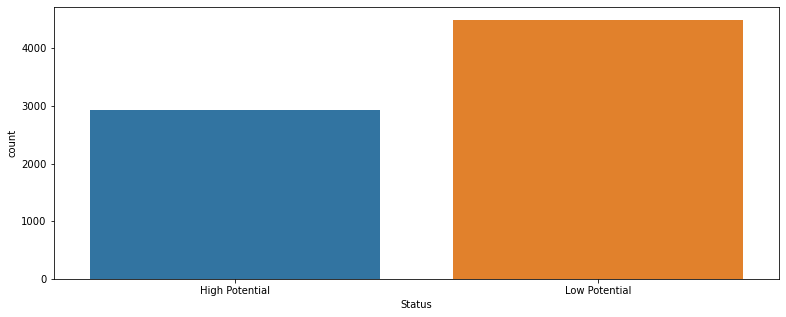

In [39]:
plt.figure(figsize=(13,5))
sns.countplot(data.Status)

In [40]:
le1 = LabelEncoder()
data['Source'] = le1.fit_transform(data['Source'])

In [41]:
le2 = LabelEncoder()
data['Sales_Agent'] = le2.fit_transform(data['Sales_Agent'])

In [42]:
le3 = LabelEncoder()
data['Location'] = le3.fit_transform(data['Location'])

In [43]:
le4 = LabelEncoder()
data['Delivery_Mode'] = le4.fit_transform(data['Delivery_Mode'])

In [44]:
le5 = LabelEncoder()
data['Status'] = le5.fit_transform(data['Status'])

In [45]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,5,2,2,4,0
1,0,5,1,2,4,0
2,0,5,1,2,4,0
3,0,5,1,2,4,0
4,0,5,1,2,4,0
...,...,...,...,...,...,...
7417,9,0,8,1,3,1
7418,15,0,3,2,4,1
7419,5,4,2,1,0,1
7420,21,3,6,2,0,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7422 non-null   int32
 1   Source         7422 non-null   int32
 2   Sales_Agent    7422 non-null   int32
 3   Location       7422 non-null   int32
 4   Delivery_Mode  7422 non-null   int32
 5   Status         7422 non-null   int32
dtypes: int32(6)
memory usage: 174.1 KB


In [47]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.038874,0.036104,-0.072673,-0.055490,-0.061418
Source,0.038874,1.000000,-0.037892,-0.100345,-0.205586,0.007470
Sales_Agent,0.036104,-0.037892,1.000000,-0.079819,-0.230738,-0.123171
Location,-0.072673,-0.100345,-0.079819,1.000000,0.304773,0.276921
Delivery_Mode,-0.055490,-0.205586,-0.230738,0.304773,1.000000,0.208119
Status,-0.061418,0.007470,-0.123171,0.276921,0.208119,1.000000


In [48]:
X = data.iloc[:,:-1]
y = data.Status

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(
)
classifier.fit(X_train,y_train)
train = classifier.predict(X_train)
pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
print("accuracy",accuracy_score(y_test,pred)*100,"%")
print(recall_score(y_test,pred))
print(precision_score(y_test,pred))
print(f1_score(y_test,pred))

[[259 361]
 [169 696]]
accuracy 64.3097643097643 %
0.8046242774566474
0.6584673604541155
0.7242455775234132


# For Tuning Logistic Regression

In [51]:
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [0.0001,0.001]
space['dual'] = [True,False]
space['fit_intercept'] = [True,False]
space['max_iter'] = [100,200]
space['multi_class'] = ["multinomial","ovr","auto"]
space['verbose'] = [0,1,2,3]
space['warm_start'] = [True,False]

# For Grid SearchCV

In [ ]:
search = GridSearchCV(classifier, space, scoring='accuracy', n_jobs=-1, cv=10)
result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# For RandomSearchCV

In [ ]:
search = RandomizedSearchCV(classifier, space, n_iter=250, scoring='accuracy', n_jobs=-1, cv=10)
result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# After Hypertuning

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.1,dual=False,fit_intercept=True,max_iter=200,
                                multi_class='auto',penalty='l1',solver='liblinear',
                                verbose=2,warm_start=False)
classifier.fit(X_train,y_train)
train = classifier.predict(X_train)
pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
print("accuracy",accuracy_score(y_test,pred)*100,"%")
print(recall_score(y_test,pred))
print(precision_score(y_test,pred))
print(f1_score(y_test,pred))

[LibLinear][[248 372]
 [162 703]]
accuracy 64.04040404040404 %
0.8127167630057803
0.653953488372093
0.724742268041237


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
knn = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

Accuracy Score: 67.2053872053872 %
Recall Score: 74.56647398843931 %
Precision Score: 70.72368421052632 %
F1 Score: 72.59425998874507 %


Status,0,1
row_0,,
0,353,220
1,267,645


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

# KNN K-value check

In [ ]:
k_range = range(1,50)
scores = {}
scores_list = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores[k] = accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

# KNN HyperParameter

In [ ]:
# define search space
space = dict()
space['n_neighbors'] = list(range(1,20))
space['weights'] = ['uniform','distance']
space['algorithm'] = ['auto','ball_tree','kd_tree','brute']
space['leaf_size'] = list(range(1,31))
space['p'] = [1,2]

# For RandomSearchCV

In [ ]:
search = RandomizedSearchCV(clf,space,n_iter=250,scoring='accuracy',n_jobs=-1,cv=10)
result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
search = GridSearchCV(clf, space, scoring='accuracy', n_jobs=-1, cv=10)
result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [54]:
clf = KNeighborsClassifier(algorithm='auto',leaf_size = 6,n_neighbors = 11,p = 2,weights='uniform')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
knn = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

Accuracy Score: 68.55218855218855 %
Recall Score: 76.878612716763 %
Precision Score: 71.35193133047211 %
F1 Score: 74.01224262659989 %


Status,0,1
row_0,,
0,353,200
1,267,665


# SVC

In [55]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
svc_rbf = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

Accuracy Score: 64.57912457912458 %
Recall Score: 88.32369942196532 %
Precision Score: 64.25567703952902 %
F1 Score: 74.39143135345667 %


Status,0,1
row_0,,
0,195,101
1,425,764


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'sigmoid')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
svc_rbf = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

In [ ]:
clf = SVC()

# SVC Tuning

In [ ]:
# define search space
space = dict()
space['C'] = list(range(1,10))
space['kernel'] = ['linear','poly','rbf']
space['degree'] = list(range(1,6))
space['gamma'] = ['scale','auto']
space['coef0'] = [0.0,0.1,0.2,0.3]
space['shrinking'] = [True,False]
space['probability'] = [True,False]
space['tol'] = [1e-3,1e-2,1e-1,1]
space['verbose'] = [True,False]
space['decision_function_shape'] = ['ovo','ovr']
space['break_ties'] = [True,False]

In [ ]:
#RandomSearchCV

search = RandomizedSearchCV(clf, space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=10)
result = search.fit(X_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
gus = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

Accuracy Score: 65.11784511784512 %
Recall Score: 73.41040462427746 %
Precision Score: 68.79739978331527 %
F1 Score: 71.02908277404921 %


Status,0,1
row_0,,
0,332,230
1,288,635


In [57]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
svc_rbf = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

Accuracy Score: 67.2053872053872 %
Recall Score: 72.71676300578035 %
Precision Score: 71.47727272727272 %
F1 Score: 72.09169054441261 %


Status,0,1
row_0,,
0,369,236
1,251,629


In [ ]:
k_range = range(1,50)
scores = {}
scores_list = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth = k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores[k] = accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
svc_rbf = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

Accuracy Score: 68.35016835016835 %
Recall Score: 77.34104046242774 %
Precision Score: 70.94379639448569 %
F1 Score: 74.00442477876106 %


Status,0,1
row_0,,
0,346,196
1,274,669


In [ ]:
k_range = range(1,50)
scores = {}
scores_list = []
for k in k_range:
    clf = RandomForestClassifier(max_depth = k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores[k] = accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

In [59]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
svc_rbf = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

Accuracy Score: 59.12457912457912 %
Recall Score: 94.21965317919076 %
Precision Score: 59.40233236151603 %
F1 Score: 72.86544479213232 %


Status,0,1
row_0,,
0,63,50
1,557,815


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
svc_rbf = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test) 

Accuracy Score: 68.61952861952862 %
Recall Score: 82.42774566473989 %
Precision Score: 69.4255111976631 %
F1 Score: 75.36997885835096 %


Status,0,1
row_0,,
0,306,152
1,314,713


In [61]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
svc_rbf = accuracy_score(y_test,y_pred)*100
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")
pd.crosstab(y_pred,y_test)

[22:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 68.08080808080808 %
Recall Score: 78.38150289017342 %
Precision Score: 70.25906735751295 %
F1 Score: 74.0983606557377 %


Status,0,1
row_0,,
0,333,187
1,287,678


In [62]:
import joblib
joblib.dump(clf,'training_model.pkl')

['training_model.pkl']

In [ ]:
pip install flask

In [ ]:
pip install flask_cors

In [64]:
import flask
import requests
from flask import request
app = flask.Flask(__name__)
app.config["DEBUG"] = True

from flask_cors import CORS
CORS(app)

@app.route('/',methods=['GET'])
def default():
    return '''<H1>Abhishek Kumar</H1>'''

@app.route('/predict',methods=['GET'])
def predict():
    model = joblib.load('training_model.pkl')
    status = model.predict([[int(request.args['Product_ID']),
                           int(request.args['Source']),
                           int(request.args['Sales_Agent']),
                           int(request.args['Location']),
                           int(float(request.args['Delivery_Mode'])),
                           ]])
    return str(status[0])

app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Jan/2022 22:22:32] "GET /predict?Product_ID=0&Source=5&Sales_Agent=2&Location=2Delivery_Mode=4 HTTP/1.1" 500 -
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Lib\site-packages\flask\app.py", line 2464, in __call__
    return self.wsgi_app(environ, start_response)
  File "C:\ProgramData\Anaconda3\Lib\site-packages\flask\app.py", line 2450, in wsgi_app
    response = self.handle_exception(e)
  File "C:\ProgramData\Anaconda3\Lib\site-packages\flask_cors\extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "C:\ProgramData\Anaconda3\Lib\site-packages\flask\app.py", line 1867, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\Lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\Lib\site-packages\flask\app.py", line 2447, in wsgi_app
   